In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy import stats

In [53]:
heart_data=pd.read_csv('heart (1).csv')
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [54]:
data=heart_data.copy()

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [56]:
data.isnull().sum()      #gives the total no. of null value

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [57]:
summary_num=data.describe()    # by default this function gives description of numerical data
summary_num

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [58]:
summary_cate=data.describe(include='O')     #it will give data for object type variables
summary_cate

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [59]:
data.index

RangeIndex(start=0, stop=918, step=1)

In [60]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [61]:
data.memory_usage()

Index              128
Age               7344
Sex               7344
ChestPainType     7344
RestingBP         7344
Cholesterol       7344
FastingBS         7344
RestingECG        7344
MaxHR             7344
ExerciseAngina    7344
Oldpeak           7344
ST_Slope          7344
HeartDisease      7344
dtype: int64

In [62]:
print(np.unique(data['Age']))

[28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77]


In [63]:
print(np.unique(data['Sex']))

['F' 'M']


In [64]:
print(np.unique(data['ChestPainType']))

['ASY' 'ATA' 'NAP' 'TA']


In [65]:
print(np.unique(data['RestingBP']))

[  0  80  92  94  95  96  98 100 101 102 104 105 106 108 110 112 113 114
 115 116 117 118 120 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 148 150 152 154 155 156
 158 160 164 165 170 172 174 178 180 185 190 192 200]


In [66]:
print(np.unique(data['Cholesterol']))

[  0  85 100 110 113 117 123 126 129 131 132 139 141 142 147 149 152 153
 156 157 159 160 161 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 190 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 297 298 299 300 302 303 304 305
 306 307 308 309 310 311 312 313 315 316 318 319 320 321 322 325 326 327
 328 329 330 331 333 335 336 337 338 339 340 341 342 344 347 349 353 354
 355 358 360 365 369 384 385 388 392 393 394 404 407 409 412 417 458 466
 468 491 518 529 564 603]


In [67]:
print(np.unique(data['FastingBS']))

[0 1]


In [68]:
print(np.unique(data['RestingECG']))

['LVH' 'Normal' 'ST']


In [69]:
print(np.unique(data['MaxHR']))

[ 60  63  67  69  70  71  72  73  77  78  80  82  83  84  86  87  88  90
  91  92  93  94  95  96  97  98  99 100 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 184 185 186 187 188 190 192 194 195 202]


In [70]:
print(np.unique(data['ExerciseAngina']))

['N' 'Y']


In [71]:
print(np.unique(data['Oldpeak']))

[-2.6 -2.  -1.5 -1.1 -1.  -0.9 -0.8 -0.7 -0.5 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7
  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.8  2.9  3.   3.1  3.2
  3.4  3.5  3.6  3.7  3.8  4.   4.2  4.4  5.   5.6  6.2]


In [72]:
print(np.unique(data['ST_Slope']))

['Down' 'Flat' 'Up']


In [73]:
print(np.unique(data['HeartDisease']))

[0 1]


<AxesSubplot:ylabel='Age'>

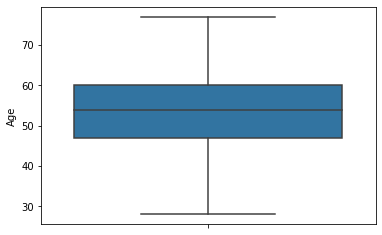

In [74]:
sns.boxplot(y=data['Age'])   #no outliers

In [75]:
pd.crosstab(index=data['ChestPainType'], columns=data['HeartDisease'],dropna=True)

HeartDisease,0,1
ChestPainType,,
ASY,104,392
ATA,149,24
NAP,131,72
TA,26,20


In [76]:
pd.crosstab(index=data['ChestPainType'], columns=data['HeartDisease'],normalize=True,dropna=True)

HeartDisease,0,1
ChestPainType,,
ASY,0.113290,0.427015
ATA,0.162309,0.026144
NAP,0.142702,0.078431
TA,0.028322,0.021786


<AxesSubplot:xlabel='ChestPainType', ylabel='HeartDisease'>

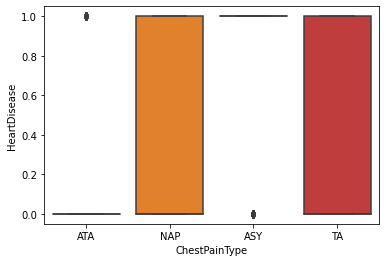

In [77]:
sns.boxplot(x=data['ChestPainType'],y=data['HeartDisease'])    # very low freq. of ATA and ASY

In [78]:
pd.crosstab(index=data['Sex'], columns=data['HeartDisease'],dropna=True)

HeartDisease,0,1
Sex,,
F,143,50
M,267,458


<AxesSubplot:xlabel='Sex', ylabel='count'>

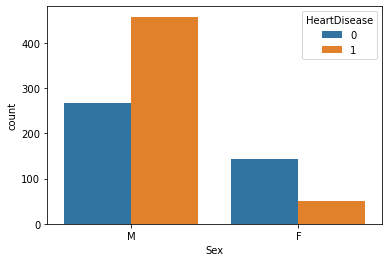

In [79]:
sns.countplot(x='Sex',data=data, hue='HeartDisease')    # males have max heart diseases

<AxesSubplot:xlabel='Sex', ylabel='HeartDisease'>

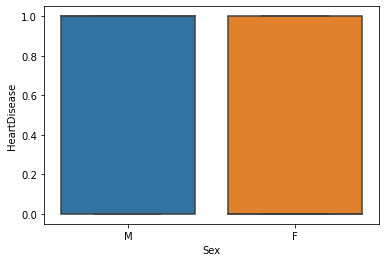

In [80]:
sns.boxplot(x=data['Sex'],y=data['HeartDisease'])    # can't infer anything

<AxesSubplot:ylabel='RestingBP'>

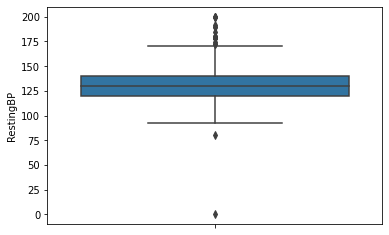

In [81]:
sns.boxplot(y=data['RestingBP'])    #outliers are there

<AxesSubplot:ylabel='Cholesterol'>

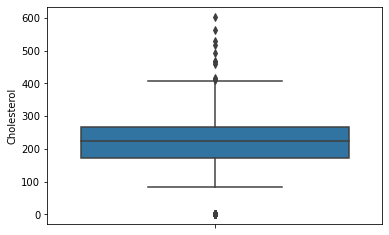

In [82]:
sns.boxplot(y=data['Cholesterol'])    #outliers are there

<AxesSubplot:ylabel='MaxHR'>

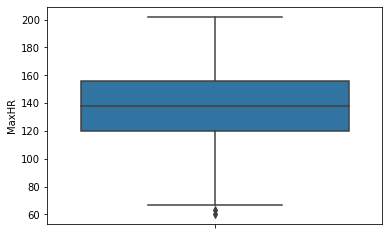

In [83]:
sns.boxplot(y=data['MaxHR'])    # just few outliers are there

In [84]:
pd.crosstab(index=data['FastingBS'], columns=data['HeartDisease'],dropna=True)

HeartDisease,0,1
FastingBS,,
0,366,338
1,44,170


In [85]:
pd.crosstab(index=data['FastingBS'], columns=data['HeartDisease'],normalize=True,dropna=True)

HeartDisease,0,1
FastingBS,,
0,0.398693,0.368192
1,0.047930,0.185185


In [86]:
pd.crosstab(index=data['RestingECG'], columns=data['HeartDisease'],dropna=True)

HeartDisease,0,1
RestingECG,,
LVH,82,106
Normal,267,285
ST,61,117


In [87]:
pd.crosstab(index=data['RestingECG'], columns=data['HeartDisease'],normalize=True,dropna=True)

HeartDisease,0,1
RestingECG,,
LVH,0.089325,0.115468
Normal,0.290850,0.310458
ST,0.066449,0.127451


In [88]:
pd.crosstab(index=data['ExerciseAngina'], columns=data['HeartDisease'],normalize=True,dropna=True)

HeartDisease,0,1
ExerciseAngina,,
N,0.386710,0.209150
Y,0.059913,0.344227


In [89]:
pd.crosstab(index=data['ExerciseAngina'], columns=data['HeartDisease'],dropna=True)

HeartDisease,0,1
ExerciseAngina,,
N,355,192
Y,55,316


<AxesSubplot:ylabel='Oldpeak'>

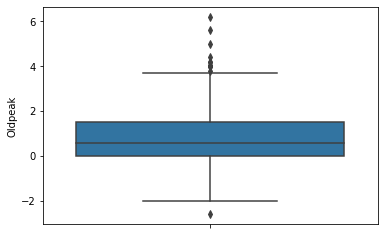

In [90]:
sns.boxplot(y=data['Oldpeak'])    #outliers are there

In [91]:
pd.crosstab(index=data['ST_Slope'], columns=data['HeartDisease'],dropna=True)

HeartDisease,0,1
ST_Slope,,
Down,14,49
Flat,79,381
Up,317,78


In [92]:
pd.crosstab(index=data['ST_Slope'], columns=data['HeartDisease'],normalize=True,dropna=True)
# very few have Down slope

HeartDisease,0,1
ST_Slope,,
Down,0.015251,0.053377
Flat,0.086057,0.415033
Up,0.345316,0.084967


In [93]:
# we have outliers in MaxHR, Cholesterol, Oldpeak, RestingBP

In [94]:
data['Age'].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
59    35
62    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
46    24
43    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
39    15
67    15
66    13
69    13
40    13
37    11
35    11
68    10
70     7
74     7
34     7
36     6
71     5
32     5
72     4
75     3
29     3
31     2
77     2
33     2
76     2
30     1
73     1
28     1
Name: Age, dtype: int64

In [95]:
data['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [96]:
data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [97]:
data['RestingBP'].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
113      1
164      1
117      1
127      1
0        1
Name: RestingBP, Length: 67, dtype: int64

In [98]:
data['Cholesterol'].value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
355      1
354      1
353      1
349      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

In [99]:
data['FastingBS'].value_counts() 

0    704
1    214
Name: FastingBS, dtype: int64

In [100]:
data['RestingECG'].value_counts() 

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [101]:
data['MaxHR'].value_counts() 

150    43
140    41
120    36
130    33
160    25
       ..
177     1
187     1
192     1
194     1
60      1
Name: MaxHR, Length: 119, dtype: int64

In [102]:
data['ExerciseAngina'].value_counts() 

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [103]:
data['Oldpeak'].value_counts() 

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 1.1      7
 0.7      7
 2.8      7
 1.9      7
 2.6      7
 1.3      7
 1.7      6
 2.2      5
 3.6      4
 0.9      4
 2.4      4
 3.4      3
 2.3      2
-1.0      2
-0.5      2
 3.5      2
 2.1      2
 4.2      2
-0.1      2
 3.2      2
-0.8      1
-0.9      1
 5.6      1
 3.8      1
 3.1      1
-0.7      1
-1.1      1
 5.0      1
-1.5      1
 3.7      1
 4.4      1
-2.0      1
 6.2      1
 2.9      1
-2.6      1
Name: Oldpeak, dtype: int64

In [104]:
data['ST_Slope'].value_counts() 

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [105]:
data['HeartDisease'].value_counts() 

1    508
0    410
Name: HeartDisease, dtype: int64

In [106]:
data.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [108]:
i=0
while i<len(data):
    if data['Cholesterol'][i]==0:
        age=data['Age'][i]
        data['Cholesterol'][i]=data['Cholesterol'][data['Age']==age].mean()
    i=i+1
data['Cholesterol']=data['Cholesterol'].replace(0.000000,data['Cholesterol'].mean())  

data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


In [109]:
z = np.abs(stats.zscore(data['Cholesterol']))
cholesterol_remove=(np.where(z>3))
cholesterol_remove
data.drop(data.index[cholesterol_remove], inplace=True)

In [110]:
z = np.abs(stats.zscore(data['RestingBP']))
restingbp_remove=(np.where(z>3))
data.drop(data.index[restingbp_remove], inplace=True)

In [111]:
z = np.abs(stats.zscore(data['MaxHR']))
maxhr_remove=(np.where(z>3))
data.drop(data.index[maxhr_remove], inplace=True)

In [112]:
z = np.abs(stats.zscore(data['Oldpeak']))
oldpeak_remove=(np.where(z>3))
data.drop(data.index[oldpeak_remove], inplace=True)

In [113]:
new_data=pd.get_dummies(data, drop_first=True)

In [114]:
columns_list=list(new_data.columns)
columns_list

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease',
 'Sex_M',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [115]:
features=list(set(columns_list)-set(['HeartDisease']))
print(features)

['Sex_M', 'RestingECG_Normal', 'MaxHR', 'RestingECG_ST', 'ChestPainType_TA', 'ExerciseAngina_Y', 'RestingBP', 'Oldpeak', 'Cholesterol', 'ST_Slope_Flat', 'Age', 'FastingBS', 'ST_Slope_Up', 'ChestPainType_ATA', 'ChestPainType_NAP']


In [117]:
y=new_data['HeartDisease'].values
x=new_data[features].values

In [118]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)

## LOGISTIC REGRESSION

In [119]:
logistic=LogisticRegression()

In [120]:
logistic.fit(train_x,train_y)
prediction=logistic.predict(test_x)

C:\Users\GAURAV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
confusion_matrix = confusion_matrix(test_y, prediction)
confusion_matrix

array([[102,  17],
       [ 11, 137]], dtype=int64)

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)

0.8951310861423221


In [123]:
(test_y!=prediction).sum()   #misclassified data

28

## KNN

In [124]:
KNN_classifier= KNeighborsClassifier(n_neighbors=7)

In [125]:
KNN_classifier.fit(train_x,train_y)
prediction=KNN_classifier.predict(test_x)

In [126]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y, prediction)
confusion_matrix

array([[ 74,  45],
       [ 41, 107]], dtype=int64)

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)

0.6779026217228464


In [128]:
(test_y!=prediction).sum()   #misclassified data

86

## LOGISTIC REGRESSION AfTER fEATURE SCALING

In [129]:
dataset = data.copy()

new_data=pd.get_dummies(dataset, drop_first=True)

X = new_data.loc[:, ['ChestPainType_ATA', 'FastingBS', 'ChestPainType_TA', 'ST_Slope_Flat', 'Cholesterol', 'RestingECG_Normal', 'ExerciseAngina_Y', 'ChestPainType_NAP', 'RestingECG_ST', 'ST_Slope_Up', 'Age', 'Sex_M', 'MaxHR', 'RestingBP', 'Oldpeak']].values
y = new_data.loc[:, 'HeartDisease'].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [130]:
# making LogisticRegression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [131]:
#making predictions on test data
y_predict = classifier.predict(X_test)

In [132]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)

In [133]:
cm

array([[ 85,  16],
       [ 12, 110]], dtype=int64)

In [134]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test, y_predict)
print(accuracy_score)

0.874439461883408


#  Gaussian Naive bayes

In [135]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
gnb=GaussianNB()
y_pred=gnb.fit(X_train,y_train).predict(X_test)

In [136]:

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 85,  16],
       [ 11, 111]], dtype=int64)

In [137]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

0.8789237668161435

# SVM- svc

In [138]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
clf = svm.SVC()
y_pred=clf.fit(X_train,y_train).predict(X_test)

In [139]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 87,  14],
       [  8, 114]], dtype=int64)

In [140]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

0.9013452914798207

# SVM- LinearSvc

In [141]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [142]:
from sklearn.svm import LinearSVC
clf=LinearSVC()
y_pred=clf.fit(X_train,y_train).predict(X_test)

In [143]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 85,  16],
       [ 12, 110]], dtype=int64)

In [144]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

0.874439461883408

# SVM- NuSVC

In [145]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [146]:
from sklearn.svm import NuSVC
clf=NuSVC()
y_pred=clf.fit(X_train,y_train).predict(X_test)

In [147]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 82,  19],
       [  6, 116]], dtype=int64)

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

0.8878923766816144

# Decision tree

In [149]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [150]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
y_pred=clf.fit(X_train,y_train).predict(X_test)

In [151]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[81, 20],
       [28, 94]], dtype=int64)

In [152]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

0.7847533632286996

# Random forest classifier

In [153]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [154]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[81, 20],
       [28, 94]], dtype=int64)

In [155]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
y_pred=clf.fit(X_train,y_train).predict(X_test)

In [156]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

0.874439461883408

## Gradient Boosting Model

In [157]:

# evaluate gradient boosting algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

# define the model
model = GradientBoostingClassifier()
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Mean Accuracy: 0.870 (0.032)


In [279]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [280]:
gradientregressor=GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)
model=gradientregressor.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [281]:
r2_score(y_pred,y_test)

0.2739524755787168

   # RESULT:
### Best Models out of all are Logistic Regression Model with an accuracy of 89.51% and SVM-SVC Model with an accuracy of 90.13%